In [1]:
%matplotlib tk

# Lattice gas sim

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from hexalattice.hexalattice import *
import time
from Modules.modGaphics import *
from Modules.modulogl import modulogl as gl
from tqdm import tqdm, trange

class LatticeGasSim:

    def __init__(self,L,rho,flowRate=1,scale=4,seed=12345678):
        # Abbreviazioni per le direzioni
        self.RI = 1      
        self.RD = 2
        self.LD = 4
        self.LE = 8
        self.LU = 16
        self.RU = 32        
        self.S = 64
        self.B = 128
        
        # Parametri iniziali
        self.rho = rho
        self.N = int(L*L*7*rho)
        self.L = L
        self.flowRate = flowRate
        self.scale = scale
        self.format = format
        self.seed = (seed // 10 ** np.arange(7,-1,-1)[:] % 10).astype(dtype=int,order='F')
        self.rng = np.random.default_rng(seed=seed)

        # Generazione regole collisione
        gl.gen_rules(self.N,self.flowRate,self.scale,self.seed)

        # Inizializzazione del lattice
        self.lattice = np.zeros((self.L,self.L),dtype=np.uint8)
        self.newLattice = np.zeros((self.L,self.L),dtype=np.uint8)
        
        # Barriera sopra e sotto
        self.lattice[1,:] = self.B
        self.lattice[self.L-2,:] = self.B

        #Creazione di una barriera e delle particelle iniziali
        x,y = self.rng.integers(2,self.L-2,self.N),self.rng.integers(2,self.L-2,self.N)
        self.lattice[x,y] = 127
        #self.lattice[int(self.L*.4):int(self.L*.7),int(self.L*0.7)] = self.B

    def lattice_ini(self):
        self.fig, self.ax = plt.subplots()
        hex_centers, _ = create_hex_grid(nx=self.L,ny=self.L,do_plot=False,align_to_origin=False)
        self.x_hex_coords = hex_centers[:, 0]
        self.y_hex_coords = hex_centers[:, 1]
        c = self.draw_colors()
        plot_single_lattice_custom_colors(self.x_hex_coords, self.y_hex_coords,face_color=c,edge_color=[1,1,1],min_diam=1,plotting_gap=0,rotate_deg=0,h_ax=self.ax)
        plt.show()       

    
    def draw_colors(self):
        barr = np.array([1.,0.,0.])
        parr = np.array([0.,0.,1.])
        return gl.count_lattice(self.lattice,barr,parr)


    def animation1(self,frames,dpi=80,filename="Sim",format="gif",):
        
        def update(frame):
            colors = self.draw_colors() 
            self.lattice = gl.update_lattice(self.lattice).astype(dtype=np.uint8,order='F')

            p_bar.update()
            if frame==frames-1:
                tqdm.close(p_bar)
                print("Salvataggio...")                
            return collection.set_facecolors(colors)

        # Parameters
        x_dim = self.L
        y_dim = self.L
        diam = 1
        
        # Generazione dell'animazione
        figure, axs = plt.subplots()
        figure.set_size_inches(12, 12)
        
        print("Creazione lattice...")        
        centers, _ = create_hex_grid(nx = x_dim, ny = y_dim, min_diam = diam)
        
        polygons = [mpatches.RegularPolygon((x, y), numVertices = 6, radius = diam / np.sqrt(3)) for x, y in zip(centers[:, 0], centers[:, 1])]
        collection = PatchCollection(polygons)
        axs.add_collection(collection)

        axs.set_aspect('equal')
        axs.axis([
            centers[:, 0].min() - 2 * diam,
            centers[:, 0].max() + 2 * diam,
            centers[:, 1].min() - 2 * diam,
            centers[:, 1].max() + 2 * diam,
        ])

        # Animate
        print("Inizio simulazione...")
        p_bar = tqdm(range(frames),leave=True)
        ani = animation.FuncAnimation(figure, func = update, frames = frames)
        
        if format == "gif":
            ani.save(filename="/root/MyCode/Lab_Comp/Proj/Images/"+filename+".gif", writer="pillow",dpi=dpi,fps=10)
        elif format == "mp4":
            Writer = animation.writers['ffmpeg']
            writer = Writer(fps=20, metadata=dict(artist='Me'), bitrate=8000)
            ani.save(filename="/root/MyCode/Lab_Comp/Proj/Images/"+filename+".mp4", writer=writer)


    def animation2(self,frames,dpi=80,filename="Sim",format="gif",nsite_arrows=10):
            
        def update(frame):

            d = nsite_arrows
            a = gl.vel_lattice(d,self.lattice,self.L)

            vx = a[0:d,:]
            vy = a[d:,:]
            
            
            Q.set_UVC(vx,vy)
            self.lattice = gl.update_lattice(self.lattice)

            """p_bar.update()
            if frame==frames-1:
                tqdm.close(p_bar)
                print("Salvataggio...")                
            """

        # Parameters
        x_dim = self.L
        y_dim = self.L
        diam = 1
        
        # Generazione dell'animazione
        figure, axs = plt.subplots()
        figure.set_size_inches(12, 12)
        

        print("Inizializzazione...")  
        X, Y = np.meshgrid(np.linspace(0,self.L,nsite_arrows), np.linspace(0,self.L,nsite_arrows))
        Q = axs.quiver(X, Y, 0, 0,scale=50)    
              
        
        # Animate
        print("Inizio simulazione...")
        #p_bar = tqdm(range(frames),leave=True)
        
        ani = animation.FuncAnimation(figure, func = update, frames = frames)

        if format == "gif":
            ani.save(filename="/root/MyCode/Lab_Comp/Proj/Images/"+filename+".gif", writer="pillow",dpi=dpi,fps=1)
        elif format == "mp4":
            Writer = animation.writers['ffmpeg']
            writer = Writer(fps=20, metadata=dict(artist='Me'), bitrate=8000)
            ani.save(filename="/root/MyCode/Lab_Comp/Proj/Images/"+filename+".mp4", writer=writer)

# Test fortran

Inizializzazione...
Inizio simulazione...
         349
         349
         349
         349
         349
         349


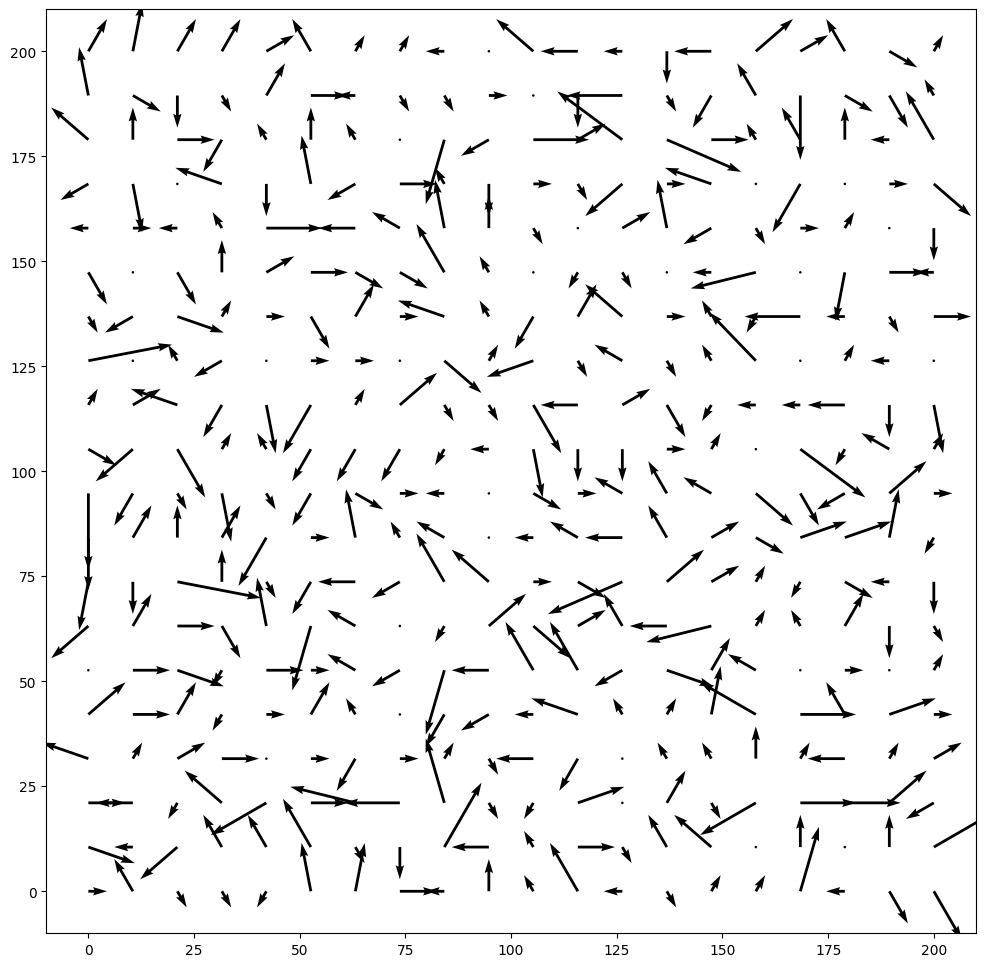

In [14]:
lgs = LatticeGasSim(200,0.001,flowRate=5)
lgs.animation2(frames=5,nsite_arrows=20)

In [3]:
from Modules.modulogl import modulogl as gl
import numpy as np
NUM_RULES = 1<<8
rule = np.zeros(NUM_RULES,dtype=int)
RI = 1      
RD = 2
LD = 4
LE = 8
LU = 16
RU = 32        
S = 64
B = 128

for i in range(B):
  rule[i] = i
rule[LU|LD|RI] = RU|LE|RD
rule[RU|LE|RD] = LU|LD|RI
# three particle rules with unperturbed particle
rule[RU|LU|LD] = LU|LE|RI
rule[LU|LE|RI] = RU|LU|LD
rule[RU|LU|RD] = RU|LE|RI
rule[RU|LE|RI] = RU|LU|RD
rule[RU|LD|RD] = LE|RD|RI
rule[LE|RD|RI] = RU|LD|RD
rule[LU|LD|RD] = LE|LD|RI
rule[LE|LD|RI] = LU|LD|RD
rule[RU|LD|RI] = LU|RD|RI
rule[LU|RD|RI] = RU|LD|RI
rule[LU|LE|RD] = RU|LE|LD
rule[RU|LE|LD] = LU|LE|RD
# two particle cyclic rules
rule[LE|RI] = RU|LD
rule[RU|LD] = LU|RD
rule[LU|RD] = LE|RI
# four particle cyclic rules
rule[RU|LU|LD|RD] = RU|LE|LD|RI
rule[RU|LE|LD|RI] = LU|LE|RD|RI
rule[LU|LE|RD|RI] = RU|LU|LD|RD
# stationary particle creation rules
rule[LU|RI] = RU|S
rule[RU|LE] = LU|S
rule[LU|LD] = LE|S
rule[LE|RD] = LD|S
rule[LD|RI] = RD|S
rule[RD|RU] = RI|S
rule[LU|LE|LD|RD|RI] = RU|LE|LD|RD|S
rule[RU|LE|LD|RD|RI] = LU|LD|RD|RI|S
rule[RU|LU|LD|RD|RI] = RU|LE|RD|RI|S
rule[RU|LU|LE|RD|RI] = RU|LU|LD|RI|S
rule[RU|LU|LE|LD|RI] = RU|LU|LE|RD|S
rule[RU|LU|LE|LD|RD] = LU|LE|LD|RI|S
#// add all rules indexed with a stationary particle (dual rules)
for i in range(S):
  if i^(RU|LU|LE|LD|RD|RI|S)==61:
    print("ciao")
  rule[i^(RU|LU|LE|LD|RD|RI|S)] = rule[i]^(RU|LU|LE|LD|RD|RI|S); 
#// add rules to bounce back at barriers
for i in range(B,NUM_RULES):
  
  highBits = i&(LE|LU|RU) # & is bitwise and operator
  lowBits = i&(RI|RD|LD)
  rule[i] = B|(highBits>>3)|(lowBits<<3)

In [4]:
gl.gen_rules(5,6,7,[1,2,3,4,5,6,7,8])
for i in range(NUM_RULES):
    if rule[i]!=gl.rule[i]:
        print(i,format(i,'08b'),",  ",(rule[i]),format(gl.rule[i]))

In [5]:
ux = [1.0, 0.5, -0.5, -1.0, -0.5, 0.5, 0]
uy = [0.0, -np.sqrt(3)/2, -np.sqrt(3)/2, 0.0, np.sqrt(3)/2, np.sqrt(3)/2, 0]
vx = np.zeros(NUM_RULES)
vy = np.zeros(NUM_RULES)
for i in range(NUM_RULES):
    for dir in range(7):
        if((i&(1<<dir))!=0):
            vx[i] += ux[dir]
            vy[i] += uy[dir]

In [8]:
print(gl.vx)

[ 0.   1.   0.5  1.5 -0.5  0.5  0.   1.  -1.   0.  -0.5  0.5 -1.5 -0.5
 -1.   0.  -0.5  0.5  0.   1.  -1.   0.  -0.5  0.5 -1.5 -0.5 -1.   0.
 -2.  -1.  -1.5 -0.5  0.5  1.5  1.   2.   0.   1.   0.5  1.5 -0.5  0.5
  0.   1.  -1.   0.  -0.5  0.5  0.   1.   0.5  1.5 -0.5  0.5  0.   1.
 -1.   0.  -0.5  0.5 -1.5 -0.5 -1.   0.   0.   1.   0.5  1.5 -0.5  0.5
  0.   1.  -1.   0.  -0.5  0.5 -1.5 -0.5 -1.   0.  -0.5  0.5  0.   1.
 -1.   0.  -0.5  0.5 -1.5 -0.5 -1.   0.  -2.  -1.  -1.5 -0.5  0.5  1.5
  1.   2.   0.   1.   0.5  1.5 -0.5  0.5  0.   1.  -1.   0.  -0.5  0.5
  0.   1.   0.5  1.5 -0.5  0.5  0.   1.  -1.   0.  -0.5  0.5 -1.5 -0.5
 -1.   0.   0.   1.   0.5  1.5 -0.5  0.5  0.   1.  -1.   0.  -0.5  0.5
 -1.5 -0.5 -1.   0.  -0.5  0.5  0.   1.  -1.   0.  -0.5  0.5 -1.5 -0.5
 -1.   0.  -2.  -1.  -1.5 -0.5  0.5  1.5  1.   2.   0.   1.   0.5  1.5
 -0.5  0.5  0.   1.  -1.   0.  -0.5  0.5  0.   1.   0.5  1.5 -0.5  0.5
  0.   1.  -1.   0.  -0.5  0.5 -1.5 -0.5 -1.   0.   0.   1.   0.5  1.5
 -0.5  0.

In [18]:
print(round(vy,7))

TypeError: type numpy.ndarray doesn't define __round__ method

In [8]:
for i in range(NUM_RULES):
    if round(vy[i],7)!=gl.vy[i]:
        print(i,round(vy[i],7),gl.vy[i],vy[i]-gl.vy[i])

2 -0.8660254 -0.8660254 -1.5543624387603927e-08
3 -0.8660254 -0.8660254 -1.5543624387603927e-08
4 -0.8660254 -0.8660254 -1.5543624387603927e-08
5 -0.8660254 -0.8660254 -1.5543624387603927e-08
6 -1.7320508 -1.7320508 -3.1087248775207854e-08
7 -1.7320508 -1.7320508 -3.1087248775207854e-08
10 -0.8660254 -0.8660254 -1.5543624387603927e-08
11 -0.8660254 -0.8660254 -1.5543624387603927e-08
12 -0.8660254 -0.8660254 -1.5543624387603927e-08
13 -0.8660254 -0.8660254 -1.5543624387603927e-08
14 -1.7320508 -1.7320508 -3.1087248775207854e-08
15 -1.7320508 -1.7320508 -3.1087248775207854e-08
16 0.8660254 0.8660254 1.5543624387603927e-08
17 0.8660254 0.8660254 1.5543624387603927e-08
22 -0.8660254 -0.8660254 -1.5543624387603927e-08
23 -0.8660254 -0.8660254 -1.5543624387603927e-08
24 0.8660254 0.8660254 1.5543624387603927e-08
25 0.8660254 0.8660254 1.5543624387603927e-08
30 -0.8660254 -0.8660254 -1.5543624387603927e-08
31 -0.8660254 -0.8660254 -1.5543624387603927e-08
32 0.8660254 0.8660254 1.5543624387603

In [25]:
n=18
print(n,n^9)
print(format(n,'08b'),format(n^9,'08b'))

18 27
00010010 00011011


In [6]:
n = 9
print(n&(RI|LE))
print(n&(RI|LE)==RI )
print(n&(RI|LE)==LE)

9
False
False


In [9]:
int(7%3)

1

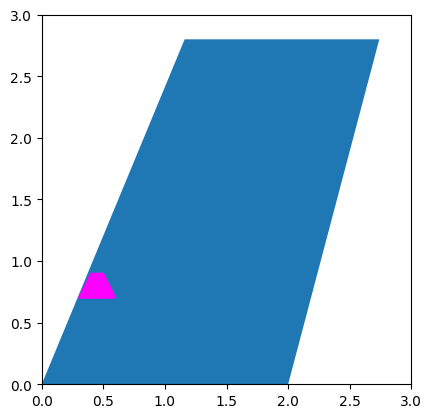

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')
ax.set_xlim(0, 3)
ax.set_ylim(0, 3)

x = [0, 1.16, 2.74, 2, 0]
y = [0, 2.8, 2.8, 0, 0]
ax.add_patch(patches.Polygon(xy=list(zip(x,y)), fill=True))

x = [0.3,0.6,.5,.4]
y = [0.7,0.7,0.9,0.9]
ax.add_patch(patches.Polygon(xy=list(zip(x,y)), fill=True, color='magenta'))